<a href="https://colab.research.google.com/github/ajit04022000/MACHINE_LEARNING/blob/main/13)K_Fold_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

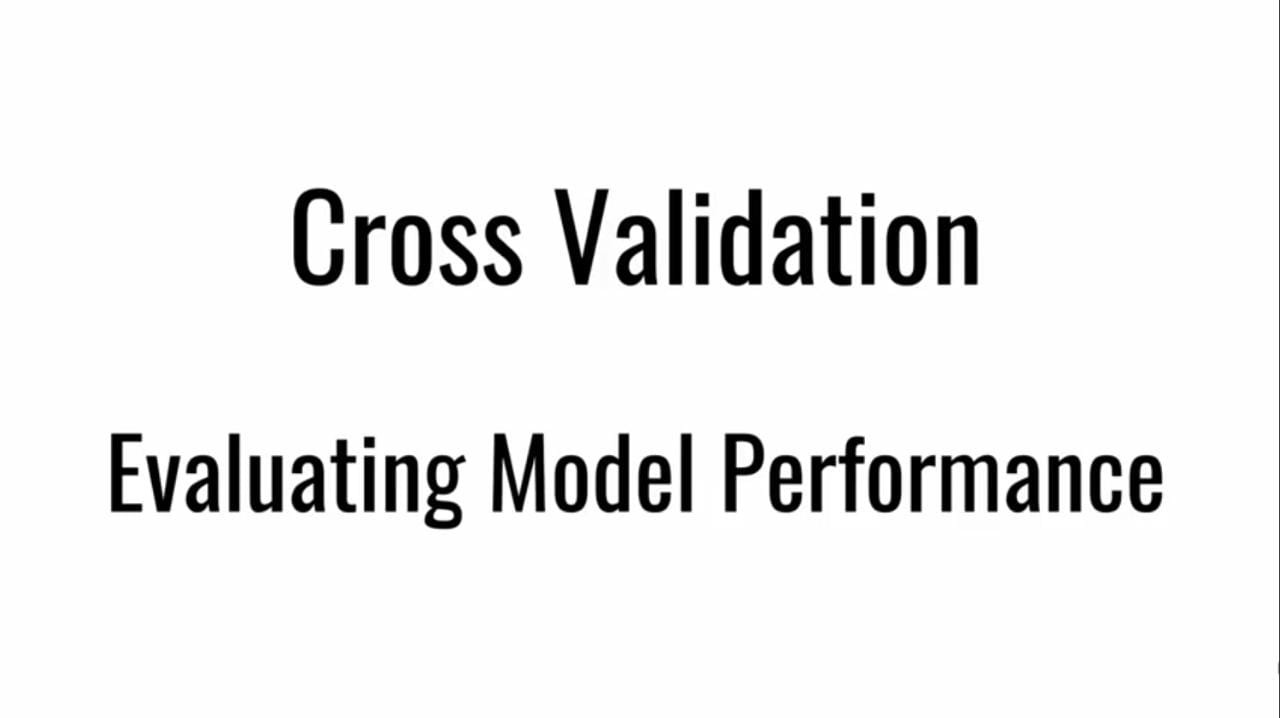

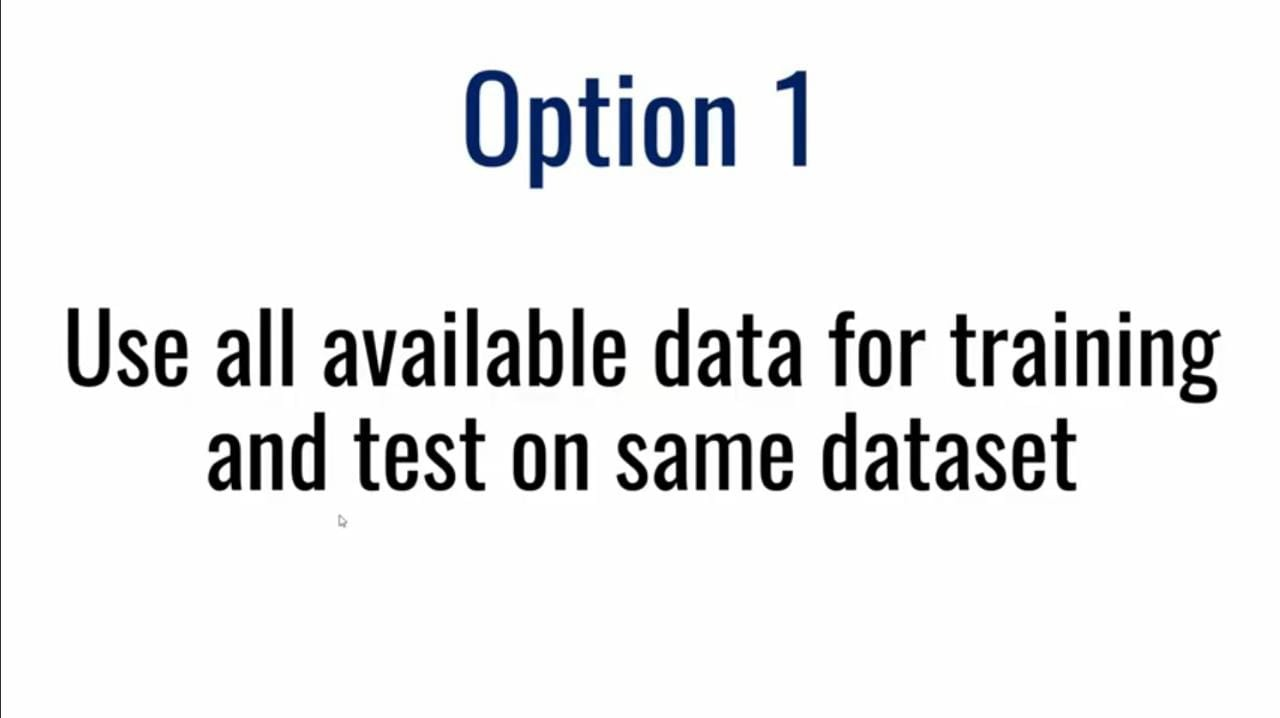

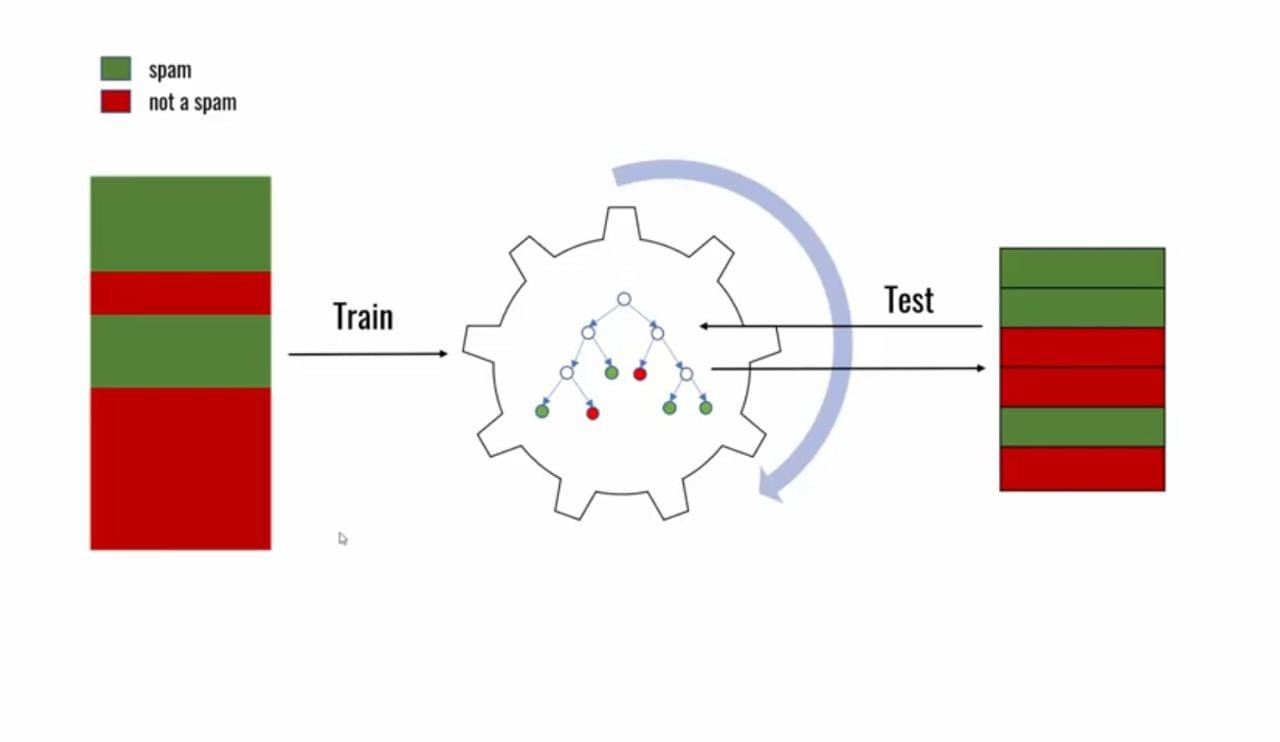

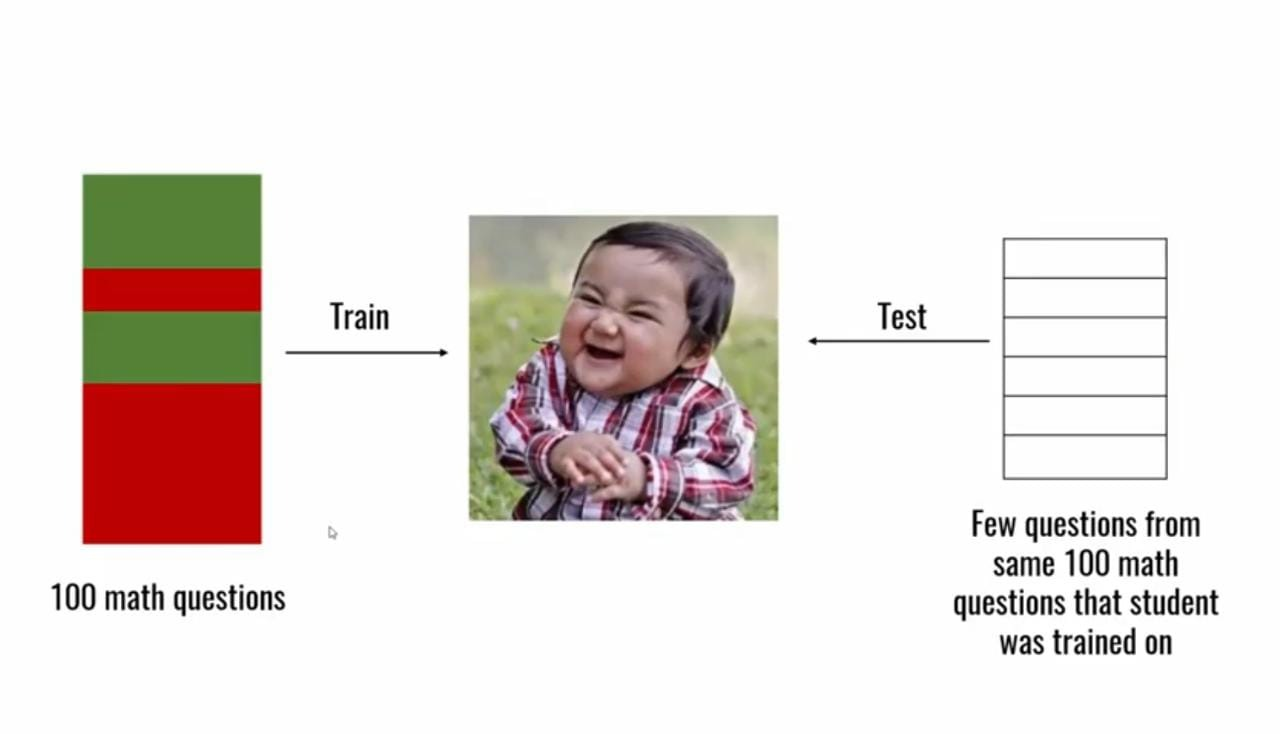

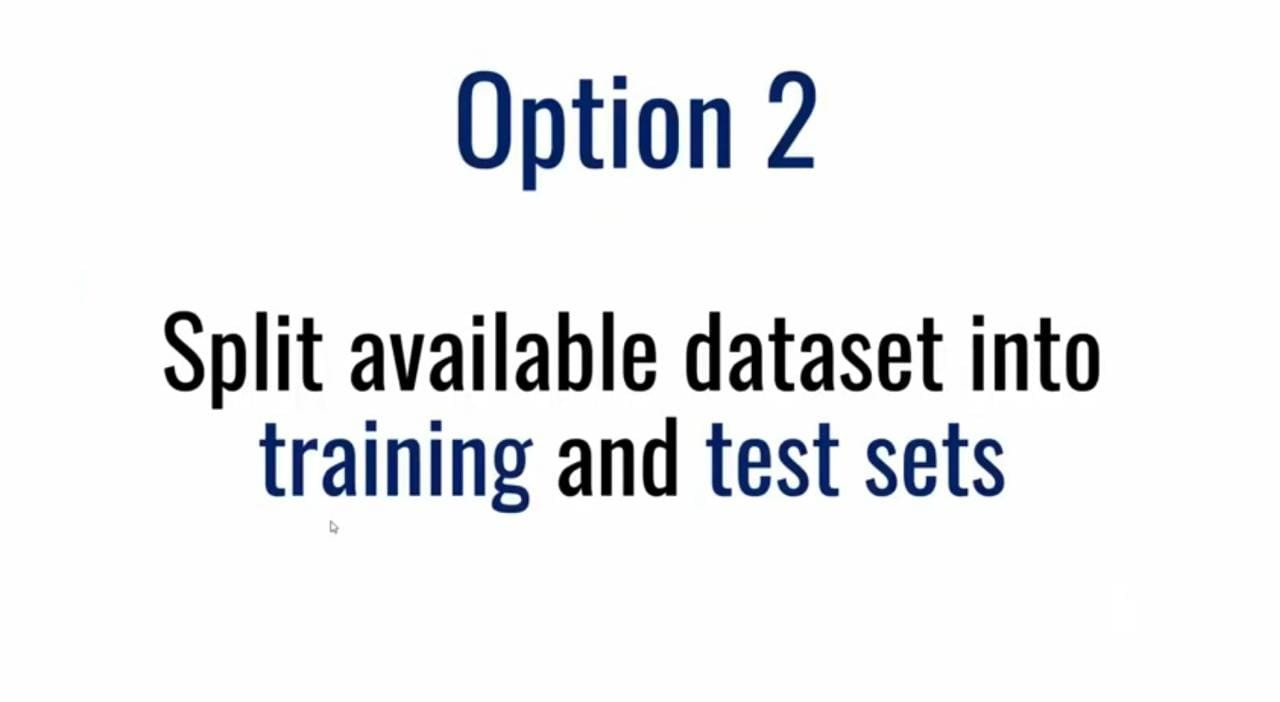

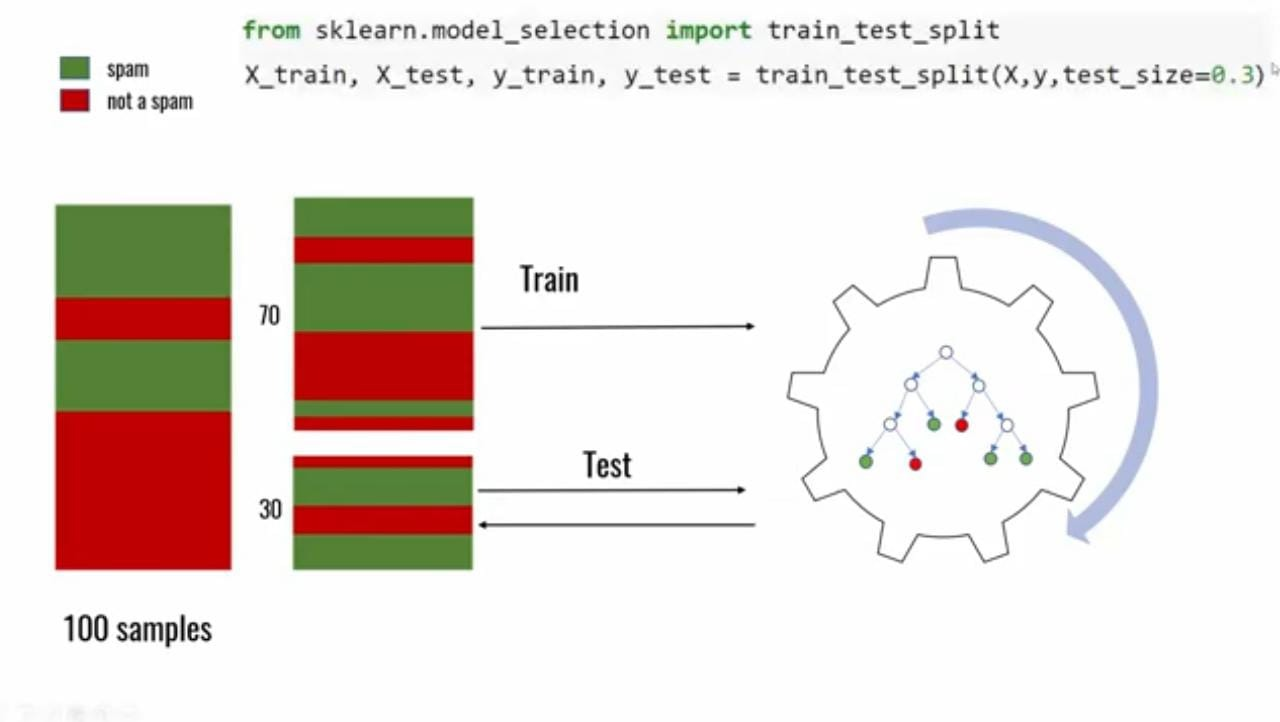

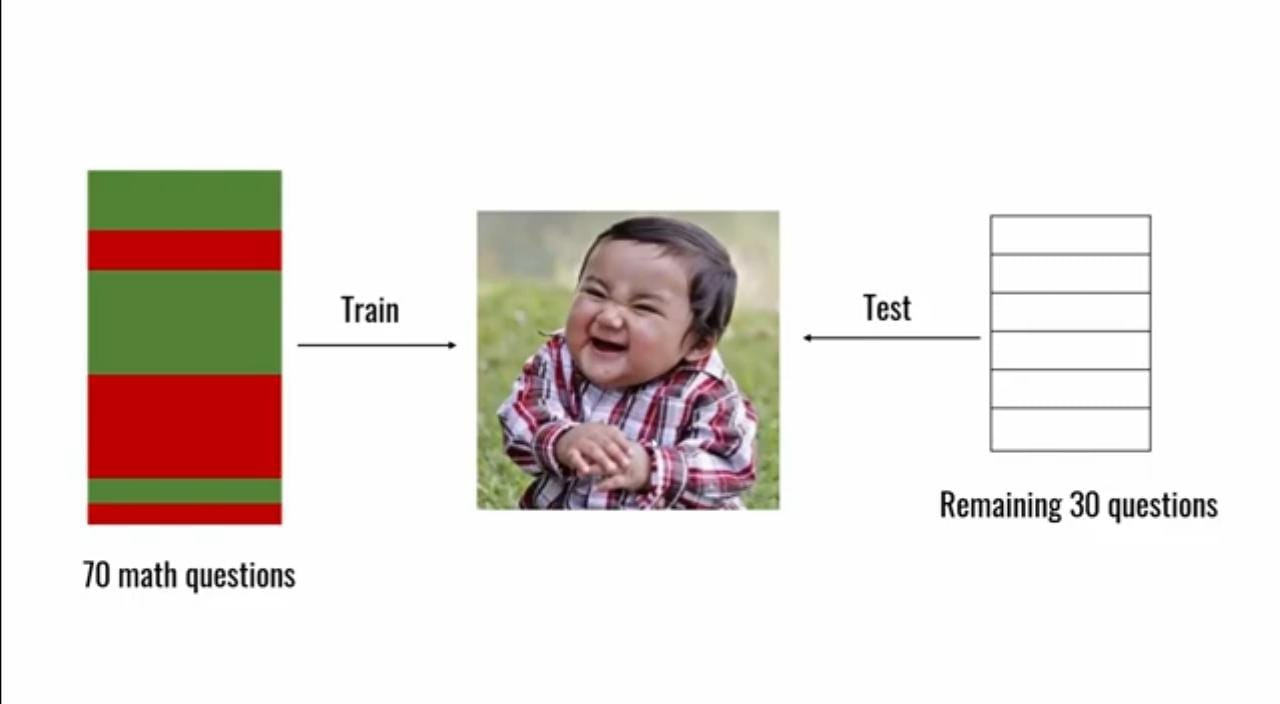

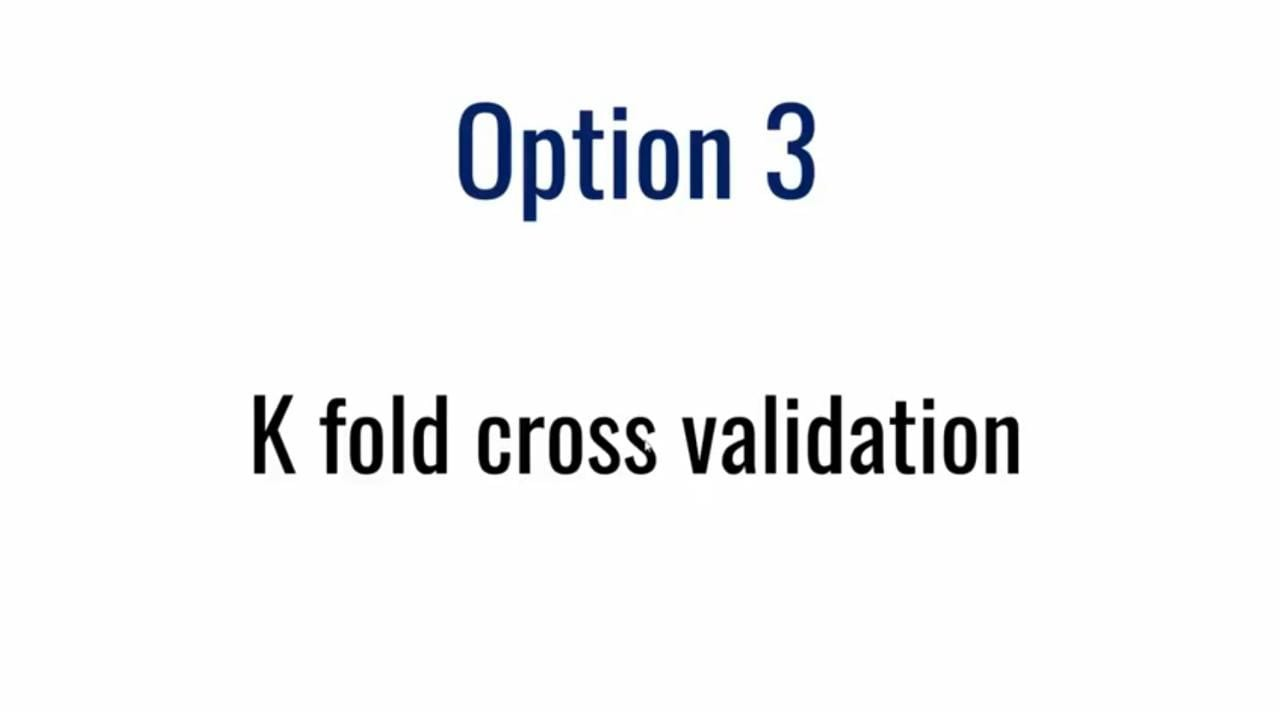

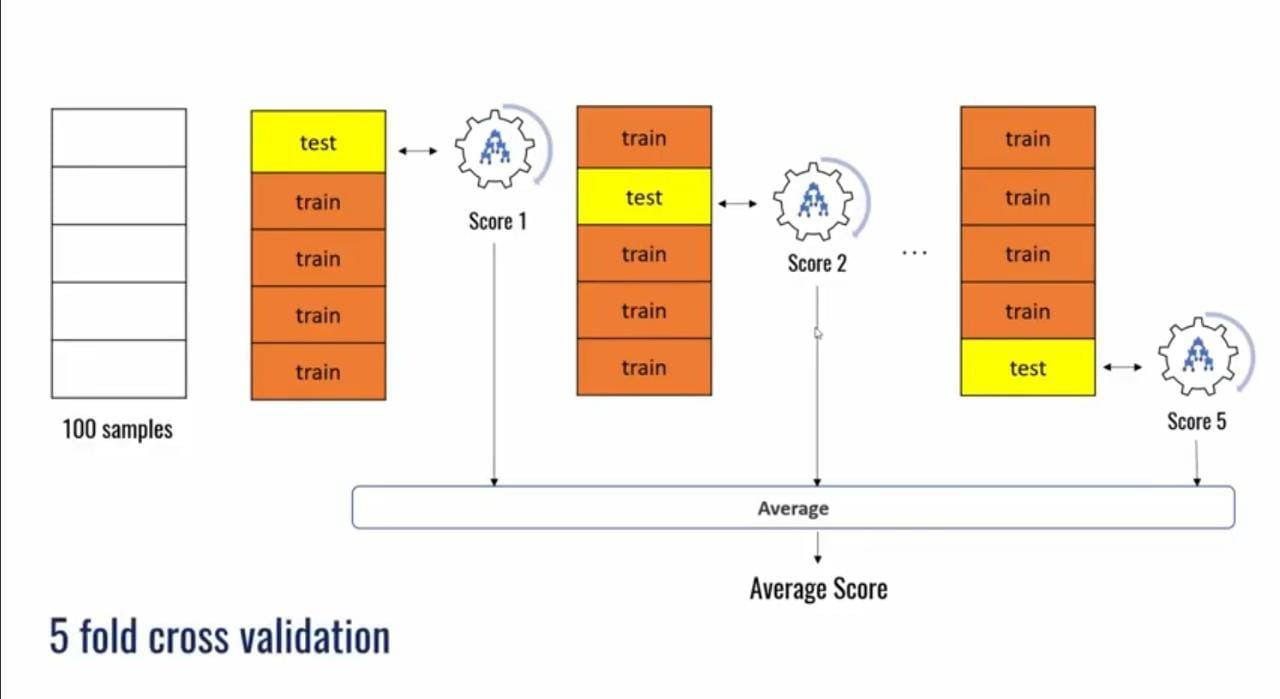

In [7]:
# importing all required librabary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [8]:
# importing dataset (digits data)
from sklearn.datasets import load_digits
digits = load_digits()

In [20]:
df = pd.DataFrame(digits.data)
df['target']=digits.target

In [21]:
# spliting dependent and independent variable
X = df.drop(['target'],axis=1)
y = df.target

In [23]:
# train and test spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

##LogisticRegression

In [28]:
# applying LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9611111111111111

##SVM

In [26]:
svm = SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.9861111111111112

##Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9583333333333334

##K_fold cross validation

###basic example

In [29]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [30]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


###Use KFold for our digits example

In [31]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [33]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                       digits.target[train_index], digits.target[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [38]:
print(f'the scores_logistic contain - {scores_logistic}')
print(f'the scores_svm contain - {scores_svm}')
print(f'the scores_rf contain - {scores_rf}')

the scores_logistic contain - [0.8948247078464107, 0.9532554257095158, 0.9098497495826378]
the scores_svm contain - [0.3806343906510851, 0.41068447412353926, 0.5125208681135225]
the scores_rf contain - [0.9232053422370617, 0.9415692821368948, 0.9198664440734557]


###<b>cross_val_score function

In [39]:
from sklearn.model_selection import cross_val_score

* Logistic regression model performance using cross_val_score

In [40]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)

array([0.89482471, 0.95325543, 0.90984975])

* svm model performance using cross_val_score

In [41]:
cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)

array([0.38063439, 0.41068447, 0.51252087])

* random forest performance using cross_val_score


cross_val_score uses stratifield kfold by default

In [42]:
cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)

array([0.92821369, 0.94824708, 0.92487479])

##<b>Parameter tunning using k fold cross validation

In [43]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
np.average(scores1)

0.8931595282433271

In [44]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
np.average(scores2)

0.9293171942892613

In [45]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
np.average(scores3)

0.9387926753569211

In [46]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)
np.average(scores4)

0.9449099937926754

Here we used cross_val_score to fine tune our random forest classifier and figured that having around 40 trees in random forest gives best result.

## EXCERCISE:

Use iris flower dataset from sklearn library and use cross_val_score against following models to measure the performance of each. In the end figure out the model with best performance,

1. Logistic Regression
2. SVM
3. Decision Tree
4. Random Forest

In [47]:
# importing all required librabary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [49]:
from sklearn.datasets import load_iris
iris = load_iris()

In [54]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df['target']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
X = df.drop('target',axis= 1)
y = df['target']

In [59]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

##LogisticRegression:

In [60]:
from sklearn.model_selection import cross_val_score

In [74]:
lr = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=3)
np.average(lr)

0.9533333333333333

##SVC

In [75]:
svc= cross_val_score(SVC(gamma='auto'),X, y,cv=3)
np.average(svc)

0.9733333333333333

##RandomForest

In [78]:
rf = cross_val_score(RandomForestClassifier(n_estimators=40),X,y,cv=3)
np.average(rf)

0.96

### best score so far is from svm:0.9733333333333333
##<b>